## Ranking Analysis

## Ziele: 
1. Test_Kategorien für region; research und special finden und probieren ob alles stimmt. 
2. 

In [1]:
##import libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
def get_list_element(val):
    #print(type(val))
    if isinstance(val, list):
        return int(val[0])
    else:
        return int(val)

In [3]:
#file_path
file_path = '../results/tts_conslidated_categories.xlsx'

In [4]:
#import datasets
df_regions = pd.read_excel(file_path,sheet_name='regions',index=False)
df_research = pd.read_excel(file_path,sheet_name='research_areas',index=False)
df_special = pd.read_excel(file_path,sheet_name='special',index=False)

In [5]:
df_regions.head()

,Rank,origin_tt_name,Category,Year,Country,parenthesis,clean_tt,cleaned_category
0,1,brookings institution (united states),Top 30 Think Tanks United States,2008,United States,['(united states)'],brookings institution,Top Think Tanks in the United States
1,2,council on foreign relations,Top 30 Think Tanks United States,2008,United States,[],council on foreign relations,Top Think Tanks in the United States
2,3,carnegie endowment for international peace,Top 30 Think Tanks United States,2008,United States,[],carnegie endowment for international peace,Top Think Tanks in the United States
3,4,rand corporation,Top 30 Think Tanks United States,2008,United States,[],rand corporation,Top Think Tanks in the United States
4,5,heritage foundation,Top 30 Think Tanks United States,2008,United States,[],heritage foundation,Top Think Tanks in the United States


# Analyse: 

## Regions

Als erstes wollen wir sehen, wie viele think tanks pro Jahr in einer Kategorie wareN. Dazu erstellen wir eine Tabelle in der für jede Kategorie die Anzahl der think tanks pro Jahr angezeigt wird.

In [6]:
table_regions = pd.pivot_table(df_regions, values='clean_tt', index=['cleaned_category'], columns=['Year'], 
               aggfunc=lambda x: len(x.unique()))

In [7]:
table_regions

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cleaned_category,,,,,,,,,,,
Top 25 Think Tanks in Eastern Europe,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in Latin America and the Caribbean,30.0,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in North America (Non-US),24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in Southern Africa (including Sub-Saharan Africa),26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in Southern Africa (including sub-Saharan Africa),NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Top 40 Think Tanks in Asia (Excluding China, India, Japan, and the Republic of Korea)",NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN
Top 40 Think Tanks in Latin America and the Caribbean,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 45 Think Tanks in South and Central America,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN
Top Think Tank in the World,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Dann suchen wir uns eine Kategorie raus, die vielversprechend aussieht und arbeiten mit ihr weiter. In diesem Fall ist die ausgewählte Kategorie 'Top Think Tanks Worldwide (US and non-US)'. Wir haben sie ausgesucht weil sie seit 2009 dabei ist und stark wächst.
Im nächsten Schritt lassen wir uns die Anzahl der think tanks über die Jahre in der ausgewählten Kategorie anzeigen. Das ist zwar eigentlich nicht nötig, da wir die Informationen schon aus der Tabelle oben haben aber es ist übersichtlicher. 

In [8]:
table_regions.loc['Top Think Tanks Worldwide (US and non-US) ']

Year
2008      NaN
2009     25.0
2010     25.0
2011     30.0
2012    150.0
2013    150.0
2014    150.0
2015    172.0
2016    173.0
2017    172.0
2018    175.0
Name: Top Think Tanks Worldwide (US and non-US) , dtype: float64

Jetzt wollen wir für die ausgewählte Kategorie ein eigenes Dataframe erstellen. Mithilfe des Index kann man sich dann die gerankten Think Tanks für ein Jahr anzeigen lassen. 0 steht für 2009, da die Kategorie in dem Jahr das erste Mal vorkommt. 

In [9]:
#get dataframe for category: Top Think Tanks Worldwide (US and non-US)
test_worldwide = df_regions[df_regions['cleaned_category']=='Top Think Tanks Worldwide (US and non-US) ']

In [10]:
list_worldwide = []
for year, df_year in test_worldwide.groupby('Year'):
    #name the dataframe
    df_year.index.name=year
    #append dataframe to list
    list_worldwide.append(df_year)

In [11]:
#you can access each dataframe by indexing the list:
list_worldwide[0].head()

,Rank,origin_tt_name,Category,Year,Country,parenthesis,clean_tt,cleaned_category
2009,,,,,,,,
215,1,brookings institution (united states),Top 25 Think Tanks â€“ Worldwide (US and Non-US),2009,United States,['(united states)'],brookings institution,Top Think Tanks Worldwide (US and non-US)
216,2,council on foreign relations us,Top 25 Think Tanks â€“ Worldwide (US and Non-US),2009,United States,[],council on foreign relations,Top Think Tanks Worldwide (US and non-US)
217,3,carnegie endowment for international peace us,Top 25 Think Tanks â€“ Worldwide (US and Non-US),2009,United States,[],carnegie endowment for international peace,Top Think Tanks Worldwide (US and non-US)
218,4,rand corporation us,Top 25 Think Tanks â€“ Worldwide (US and Non-US),2009,United States,[],rand corporation,Top Think Tanks Worldwide (US and non-US)
219,5,cato institute us,Top 25 Think Tanks â€“ Worldwide (US and Non-US),2009,United States,[],cato institute,Top Think Tanks Worldwide (US and non-US)


In [12]:
#drop years with too little values and set them to equal length of 150:
final_list = []
for l in list_worldwide:
    if len(l)>149.0:
        l = l.head(150).reset_index()
        final_list.append(l)
        
len(final_list)

7

Hier werden die Ranks in Dezile eingeteilt. Also in zehn gleich große Gruppen. 

In [ ]:
#create a list of datasets. each datasets split-rearranged by groups:
list_dz_dfs = []
for f in final_list:
    dz_df = np.array_split(f, 10)
    dz_list = []
    for idx,group in enumerate(dz_df):
        group['dezil'] = idx+1
        dz_list.append(group)
    dz_all = pd.concat(dz_list)
    list_dz_dfs.append(dz_all)

In [ ]:
list_dz_dfs[1].head(20)

## 2: overview of datasets:

In [15]:
#how many think-tanks in total in this category?
top_ww_all = pd.concat(list_dz_dfs)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Wieviele einzelne Think Tanks wurden in all den Jahren gerankt? Wenn die Zahl groß ist, bedeutet das, dass viele neue Think Tanks dazu kamen. 
In diesem Fall kamen insgesamt 54 im Laufe der sieben Jahre dazu. 

In [16]:
#this is the number of think-tanks that have been listed over 7 years within the ranking:
len(top_ww_all['clean_tt'].value_counts())

204

Wir können uns auch für die Think Tanks anzeigen lassen in welchem Dezil sie jedes Jahr gerankt wurden. So kann man schon gut erkennen welche Think Tanks ziemlich stabil waren und bei welchen der Rank stark geschwankt hat. 

In [17]:
top_ww_all.groupby(['clean_tt','Year'])

table_top_ww_all = pd.pivot_table(top_ww_all, values='dezil', index=['clean_tt'], columns=['Year'], 
               aggfunc=lambda x: list(x))

In [18]:
table_top_ww_all

Year,2012,2013,2014,2015,2016,2017,2018
clean_tt,,,,,,,
adam smith institute,NaN,NaN,NaN,[9],[9],[9],[9]
african centre for technology studies,[7],NaN,NaN,NaN,NaN,NaN,NaN
african centre for the constructive resolution of disputes,[5],[5],[5],[5],[5],[3],[3]
african economic research consortium,[5],[5],[5],[5],[5],[5],[5]
african technology policy studies network,[7],[7],[7],[7],[7],[7],[7]
al-ahram center for political and strategic studies,[4],[4],[4],[4],[4],[4],[4]
american enterprise institute for public policy research,[2],[2],[2],[2],[2],[3],[3]
amnesty international,[1],[1],[1],[1],[2],[3],[3]
asia society policy institute,NaN,NaN,NaN,[10],[9],[8],[8]


In [19]:
#table_top_ww_all[table_top_ww_all['Year']==2008]

In [20]:
#An initial approach: how many unique think-tanks per decile, over the years?
dz_years = top_ww_all.groupby('dezil')['clean_tt'].nunique()

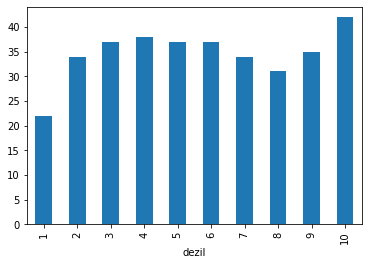

In [21]:
dz_years.plot.bar(x='dezil', y='unique think tanks (2012-18)')
#dz_years.plot(color='orange')

In [22]:
dz_years

dezil
1     22
2     34
3     37
4     38
5     37
6     37
7     34
8     31
9     35
10    42
Name: clean_tt, dtype: int64

In [23]:
sanky = table_top_ww_all[[2012,2018]]
sanky = sanky.fillna(0)

sanky[2012] = sanky[2012].apply(get_list_element)
sanky[2018] = sanky[2018].apply(get_list_element)
sanky['value'] = 1

In [ ]:
#sanky_export = sanky.groupby([2012,2018]).size().reset_index().rename(columns={0:'count'})
#sanky_export

In [25]:
sanky_export.reset_index().to_csv('../results/sanky_test.csv',index_label=False,index=False)

 Auf dieser Seite kann man Sanky Diagrams erstellen: 
 https://chart-studio.plot.ly

## Research

In [40]:
#Übersicht wie viele think-tanks pro Jahr pro Kategorie
table_research = pd.pivot_table(df_research, values='clean_tt', index=['cleaned_category'], columns=['Year'], 
               aggfunc=lambda x: len(x.unique()))

In [41]:
table_research

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cleaned_category,,,,,,,,,,,
List of Food Security Think Tanks (Alphabetical Listing not ranked),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.0
List of Water Security Think Tanks (Alphabetical Listing not ranked),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0
Top Education Policy Think Tanks,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN
Top Defense and National Security Think Tanks,NaN,NaN,NaN,NaN,NaN,65.0,84.0,106.0,108.0,103.0,111.0
Top Domestic Economic Policy Think Tanks,10.0,10.0,25.0,30.0,79.0,79.0,79.0,127.0,130.0,132.0,140.0
Top Domestic Health Affairs Think Tanks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0
Top Domestic Health Policy Think Tanks,NaN,NaN,NaN,NaN,NaN,NaN,30.0,55.0,55.0,55.0,NaN
Top Education Policy Think Tanks,NaN,NaN,NaN,NaN,NaN,NaN,55.0,65.0,65.0,61.0,65.0
Top Education Policy Think Tanks (Unranked and in Alphabetical order),NaN,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
table_research.loc['Top International Economics Policy Think Tanks']

Year
2008    11.0
2009    10.0
2010    25.0
2011    30.0
2012    49.0
2013    50.0
2014    50.0
2015    81.0
2016    84.0
2017    83.0
2018    86.0
Name: Top International Economics Policy Think Tanks, dtype: float64

In [50]:
#get dataframe for category: Top Think Tanks Worldwide (US and non-US)
test_int_economics = df_research[df_research['cleaned_category']=='Top International Economics Policy Think Tanks']

In [51]:
list_int_ec = []
for year, df_year in test_int_economics.groupby('Year'):
    #name the dataframe
    df_year.index.name=year
    #append dataframe to list
    list_int_ec.append(df_year)

In [52]:
#you can access each dataframe by indexing the list:
list_int_ec[0].head()

,Rank,origin_tt_name,Category,Year,country,parenthesis,clean_tt,cleaned_category
2008,,,,,,,,
54,1,brookings institution (usa),top 10 international economic policy think tanks,2008,United States,['(usa)'],brookings institution,Top International Economics Policy Think Tanks
55,2,peterson institute for international economics...,top 10 international economic policy think tanks,2008,United States,['(usa)'],peterson institute for international economics,Top International Economics Policy Think Tanks
56,3,fraser institute (canada),top 10 international economic policy think tanks,2008,Canada,['(canada)'],fraser institute,Top International Economics Policy Think Tanks
57,4,national bureau of economic research (usa),top 10 international economic policy think tanks,2008,United States,['(usa)'],national bureau of economic research,Top International Economics Policy Think Tanks
58,5,"adam smith institute, uk",top 10 international economic policy think tanks,2008,United Kingdom,[],"adam smith institute,",Top International Economics Policy Think Tanks


In [53]:
#drop years with too little values and set them to equal length of 150:
final_list_2 = []
for l in list_int_ec:
    if len(l)>24.0:
        l = l.head(25).reset_index()
        final_list_2.append(l)
        
len(final_list_2)

9

In [56]:
#create a list of datasets. each datasets split-rearranged by groups:
list_dz_dfs_2 = []
for f in final_list_2:
    dz_df_2 = np.array_split(f, 10)
    dz_list_2 = []
    for idx,group in enumerate(dz_df_2):
        group['dezil'] = idx+1
        dz_list_2.append(group)
    dz_all_2 = pd.concat(dz_list_2)
    list_dz_dfs_2.append(dz_all_2)

In [ ]:
list_dz_dfs_2[0].head(50)

In [63]:
#how many think-tanks in total in this category?
top_int_ec_all = pd.concat(list_dz_dfs_2)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [64]:
#this is the number of think-tanks that have been listed over 7 years within the ranking:
len(top_int_ec_all['clean_tt'].value_counts())

47

In [65]:
top_int_ec_all.groupby(['clean_tt','Year'])

table_top_int_ec_all = pd.pivot_table(top_int_ec_all, values='dezil', index=['clean_tt'], columns=['Year'], 
               aggfunc=lambda x: list(x))

In [66]:
table_top_int_ec_all

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018
clean_tt,,,,,,,,,
adam smith institute,NaN,[8],[4],[3],[2],[3],[2],[3],[3]
american enterprise institute for public policy research,[3],[3],[2],[3],[4],[4],[5],[5],[6]
asian development bank institute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[8]
australian institute of international affairs,NaN,NaN,[10],[10],[10],[10],[9],NaN,NaN
berkeley roundtable on the international economy,[5],[5],[4],[5],[8],[5],[6],[7],[7]
brookings institution,[1],[1],[1],[1],[1],[1],[1],[1],[1]
bruegel,[2],[1],[1],[1],[1],[1],[1],[1],[1]
carnegie endowment for international peace,NaN,NaN,[5],[6],[5],[6],NaN,NaN,NaN
cato institute,[3],[3],[6],[8],[5],[6],[7],[8],[10]


In [67]:
#An initial approach: how many unique think-tanks per decile, over the years?
dz_years_2 = top_int_ec_all.groupby('dezil')['clean_tt'].nunique()

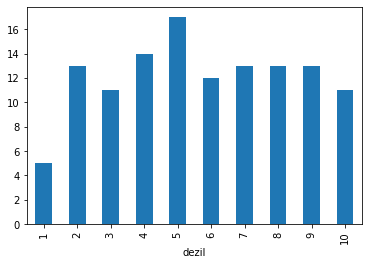

In [69]:
dz_years_2.plot.bar(x='dezil', y='unique think tanks (2010-18)')
#dz_years.plot(color='orange')

In [70]:
dz_years_2

dezil
1      5
2     13
3     11
4     14
5     17
6     12
7     13
8     13
9     13
10    11
Name: clean_tt, dtype: int64

## Special 

In [29]:
#Übersicht wie viele think-tanks pro Jahr pro Kategorie
table_special = pd.pivot_table(df_special, values='clean_tt', index=['cleaned_category'], columns=['Year'], 
               aggfunc=lambda x: len(x.unique()))

In [30]:
table_special

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cleaned_category,,,,,,,,,,,
Best Advocacy Campaign,NaN,NaN,NaN,NaN,74.0,74.0,75.0,88.0,89.0,89.0,94.0
Best For-Profit Think Tanks (Unranked and in Alphabetical order),NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN
Best Government Affiliated Think Tanks,NaN,NaN,20.0,30.0,39.0,40.0,44.0,67.0,71.0,71.0,72.0
Best Independent Think Tanks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,145.0,143.0
"Best Independent Think Tanks(Category not in rank order, institutions were nominated but not ranked and are listed in Alphabetical order)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.0,NaN,NaN,NaN
Best Institutional Collaboration Involving Two or More Think Tanks,NaN,NaN,NaN,NaN,NaN,79.0,75.0,67.0,75.0,75.0,75.0
Best Managed Think Tanks,NaN,NaN,NaN,NaN,NaN,60.0,65.0,79.0,79.0,78.0,75.0
Best New Idea or Paradigm Developed by a Think Tank,NaN,NaN,NaN,NaN,NaN,40.0,40.0,60.0,65.0,64.0,65.0
Best New Think Tank,NaN,NaN,NaN,NaN,NaN,10.0,27.0,NaN,45.0,50.0,29.0


In [31]:
table_special.loc['Think Tanks with the Most Innovative Policy Ideas/Proposals']

Year
2008     3.0
2009     5.0
2010    25.0
2011    30.0
2012    30.0
2013    30.0
2014    30.0
2015    31.0
2016    35.0
2017    35.0
2018    36.0
Name: Think Tanks with the Most Innovative Policy Ideas/Proposals, dtype: float64

In [71]:
#get dataframe for category: Top Think Tanks Worldwide (US and non-US)
test_innovative = df_special[df_special['cleaned_category']=='Think Tanks with the Most Innovative Policy Ideas/Proposals']

In [72]:
list_innovative = []
for year, df_year in test_innovative.groupby('Year'):
    #name the dataframe
    df_year.index.name=year
    #append dataframe to list
    list_innovative.append(df_year)

In [73]:
#you can access each dataframe by indexing the list:
list_innovative[0].head()

,Rank,origin_tt_name,Category,Year,country,parenthesis,clean_tt,cleaned_category
2008,,,,,,,,
0,1,cato institute (usa),Think Tanks with the Most Innovative Policy/Id...,2008,United States,['(usa)'],cato institute,Think Tanks with the Most Innovative Policy Id...
1,2,brookings institute usa,Think Tanks with the Most Innovative Policy/Id...,2008,United States,[],brookings institute,Think Tanks with the Most Innovative Policy Id...
2,3,"carnegie endowment for international peace, us",Think Tanks with the Most Innovative Policy/Id...,2008,United States,[],"carnegie endowment for international peace,",Think Tanks with the Most Innovative Policy Id...


In [75]:
#drop years with too little values and set them to equal length of 150:
final_list_3 = []
for l in list_innovative:
    if len(l)>24.0:
        l = l.head(25).reset_index()
        final_list_3.append(l)
        
len(final_list_3)

9

In [76]:
#create a list of datasets. each datasets split-rearranged by groups:
list_dz_dfs_3 = []
for f in final_list_3:
    dz_df_3 = np.array_split(f, 10)
    dz_list_3 = []
    for idx,group in enumerate(dz_df_3):
        group['dezil'] = idx+1
        dz_list_3.append(group)
    dz_all_3 = pd.concat(dz_list_3)
    list_dz_dfs_3.append(dz_all_3)

In [77]:
list_dz_dfs_3[0].head()

,2010,Rank,origin_tt_name,Category,Year,country,parenthesis,clean_tt,cleaned_category,dezil
0,52,1,brookings institution (united states),Think Tanks with the Most Innovative Policy/Id...,2010,United States,['(united states)'],brookings institution,Think Tanks with the Most Innovative Policy Id...,1
1,53,2,carnegie endowment for international peace (un...,Think Tanks with the Most Innovative Policy/Id...,2010,United States,['(united states)'],carnegie endowment for international peace,Think Tanks with the Most Innovative Policy Id...,1
2,54,3,cato institute (united states),Think Tanks with the Most Innovative Policy/Id...,2010,United States,['(united states)'],cato institute,Think Tanks with the Most Innovative Policy Id...,1
3,55,4,new america foundation (united states),Think Tanks with the Most Innovative Policy/Id...,2010,United States,['(united states)'],new america foundation,Think Tanks with the Most Innovative Policy Id...,2
4,56,5,heritage foundation (united states),Think Tanks with the Most Innovative Policy/Id...,2010,United States,['(united states)'],heritage foundation,Think Tanks with the Most Innovative Policy Id...,2


In [80]:
#how many think-tanks in total in this category?
top_innovative_all = pd.concat(list_dz_dfs_3)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [81]:
#this is the number of think-tanks that have been listed over the years within the ranking:
len(top_innovative_all['clean_tt'].value_counts())

49

In [82]:
top_innovative_all.groupby(['clean_tt','Year'])

table_top_innovative_all = pd.pivot_table(top_innovative_all, values='dezil', index=['clean_tt'], columns=['Year'], 
               aggfunc=lambda x: list(x))

In [83]:
table_top_innovative_all

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018
clean_tt,,,,,,,,,
american enterprise institute,[3],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
american enterprise institute for public policy research,NaN,[5],[4],[5],[5],[7],[7],[8],[9]
berggruen institute,NaN,NaN,NaN,NaN,NaN,NaN,[6],[7],[7]
brookings institution,[1],[1],[1],[1],[1],[1],[1],[1],[1]
carnegie endowment for international peace,[1],[1],[1],[1],[1],[1],[2],[2],[2]
cato institute,[1],[2],[2],[4],[2],[2],[2],[5],[5]
center for american progress,NaN,NaN,[7],[3],[3],[3],[3],[4],[4]
center for american progress united states,[3],[3],NaN,NaN,NaN,NaN,NaN,NaN,NaN
center for global development united states,NaN,[4],NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
#An initial approach: how many unique think-tanks per decile, over the years?
dz_years_3 = top_innovative_all.groupby('dezil')['clean_tt'].nunique()

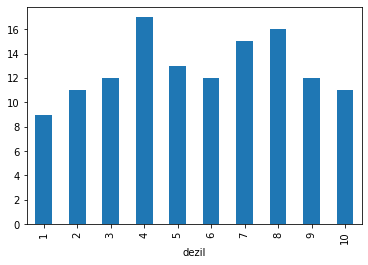

In [85]:
dz_years_3.plot.bar(x='dezil', y='unique think tanks (2010-18)')
#dz_years.plot(color='orange')

In [87]:
dz_years_3

dezil
1      9
2     11
3     12
4     17
5     13
6     12
7     15
8     16
9     12
10    11
Name: clean_tt, dtype: int64